## Co2 Emissions and Health Challenges in Africa 

In [27]:
#delcarations

import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df= p.read_csv('co2.csv')

In [29]:
df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


In [30]:
df.isnull().sum()

Country                                     0
Sub-Region                                  0
Code                                        0
Year                                        0
Population                                  0
GDP PER CAPITA (USD)                       27
GDP PER CAPITA PPP (USD)                   48
Area (Km2)                                  0
Transportation (Mt)                        12
Total CO2 Emission including LUCF (Mt)      0
Total CO2 Emission excluding LUCF (Mt)      0
Other Fuel Combustion (Mt)                 12
Manufacturing/Construction (Mt)            12
Land-Use Change and Forestry (Mt)           0
Industrial Processes (Mt)                  62
Fugitive Emissions (Mt)                   804
Energy (Mt)                                 0
Electricity/Heat (Mt)                      12
Bunker Fuels (Mt)                          12
Building (Mt)                              12
dtype: int64

In [31]:
remove= ['Sub-Region','Code','GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)','Other Fuel Combustion(Mt)',]
to_keep = df.columns.difference(remove)
df_final = df[to_keep]

In [32]:
df_final.head()

,Area (Km2),Building (Mt),Bunker Fuels (Mt),Country,Electricity/Heat (Mt),Energy (Mt),Fugitive Emissions (Mt),Industrial Processes (Mt),Land-Use Change and Forestry (Mt),Manufacturing/Construction (Mt),Other Fuel Combustion (Mt),Population,Total CO2 Emission excluding LUCF (Mt),Total CO2 Emission including LUCF (Mt),Transportation (Mt),Year
0,2381741,9.33,1.96,Algeria,29.17,76.26,14.75,3.79,0.57,6.16,0.0,30774621,80.05,80.62,16.85,2000
1,2381741,9.53,1.98,Algeria,30.20,74.88,11.86,3.77,-2.41,6.25,0.0,31200985,78.65,76.24,17.04,2001
2,2381741,9.89,2.17,Algeria,32.28,78.35,10.20,4.06,-2.41,6.62,0.0,31624696,82.40,80.00,19.36,2002
3,2381741,10.68,1.89,Algeria,32.53,84.16,12.17,4.03,-2.41,7.01,0.0,32055883,88.19,85.78,21.76,2003
4,2381741,11.52,2.19,Algeria,31.75,84.60,11.22,4.90,-2.41,8.09,0.0,32510186,89.49,87.09,22.03,2004


In [33]:
df_final.drop('Fugitive Emissions (Mt)', axis=1, inplace=True)

C:\Users\shail\AppData\Local\Temp\ipykernel_14092\1232606566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('Fugitive Emissions (Mt)', axis=1, inplace=True)


In [34]:
numeric_cols = df_final.select_dtypes(include='number').columns

# Replace null values in numeric
df_final[numeric_cols] = df_final[numeric_cols].fillna(df_final[numeric_cols].mean())

C:\Users\shail\AppData\Local\Temp\ipykernel_14092\3631679632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[numeric_cols] = df_final[numeric_cols].fillna(df_final[numeric_cols].mean())


In [35]:
df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


In [36]:
df_final.head()

,Area (Km2),Building (Mt),Bunker Fuels (Mt),Country,Electricity/Heat (Mt),Energy (Mt),Industrial Processes (Mt),Land-Use Change and Forestry (Mt),Manufacturing/Construction (Mt),Other Fuel Combustion (Mt),Population,Total CO2 Emission excluding LUCF (Mt),Total CO2 Emission including LUCF (Mt),Transportation (Mt),Year
0,2381741,9.33,1.96,Algeria,29.17,76.26,3.79,0.57,6.16,0.0,30774621,80.05,80.62,16.85,2000
1,2381741,9.53,1.98,Algeria,30.20,74.88,3.77,-2.41,6.25,0.0,31200985,78.65,76.24,17.04,2001
2,2381741,9.89,2.17,Algeria,32.28,78.35,4.06,-2.41,6.62,0.0,31624696,82.40,80.00,19.36,2002
3,2381741,10.68,1.89,Algeria,32.53,84.16,4.03,-2.41,7.01,0.0,32055883,88.19,85.78,21.76,2003
4,2381741,11.52,2.19,Algeria,31.75,84.60,4.90,-2.41,8.09,0.0,32510186,89.49,87.09,22.03,2004


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area (Km2)                              1134 non-null   int64  
 1   Building (Mt)                           1134 non-null   float64
 2   Bunker Fuels (Mt)                       1134 non-null   float64
 3   Country                                 1134 non-null   object 
 4   Electricity/Heat (Mt)                   1134 non-null   float64
 5   Energy (Mt)                             1134 non-null   float64
 6   Industrial Processes (Mt)               1134 non-null   float64
 7   Land-Use Change and Forestry (Mt)       1134 non-null   float64
 8   Manufacturing/Construction (Mt)         1134 non-null   float64
 9   Other Fuel Combustion (Mt)              1134 non-null   float64
 10  Population                              1134 non-null   int6

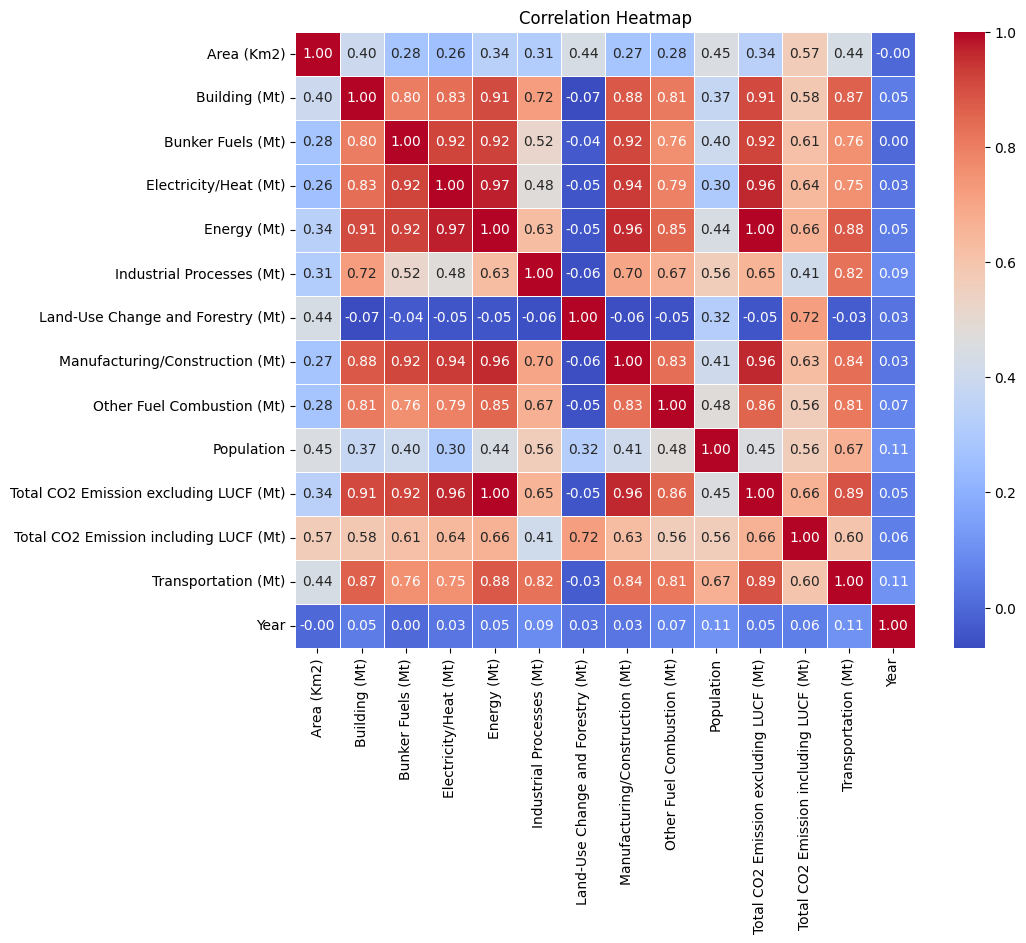

In [38]:
# Calculate the correlation matrix
correlation_matrix = df_final[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

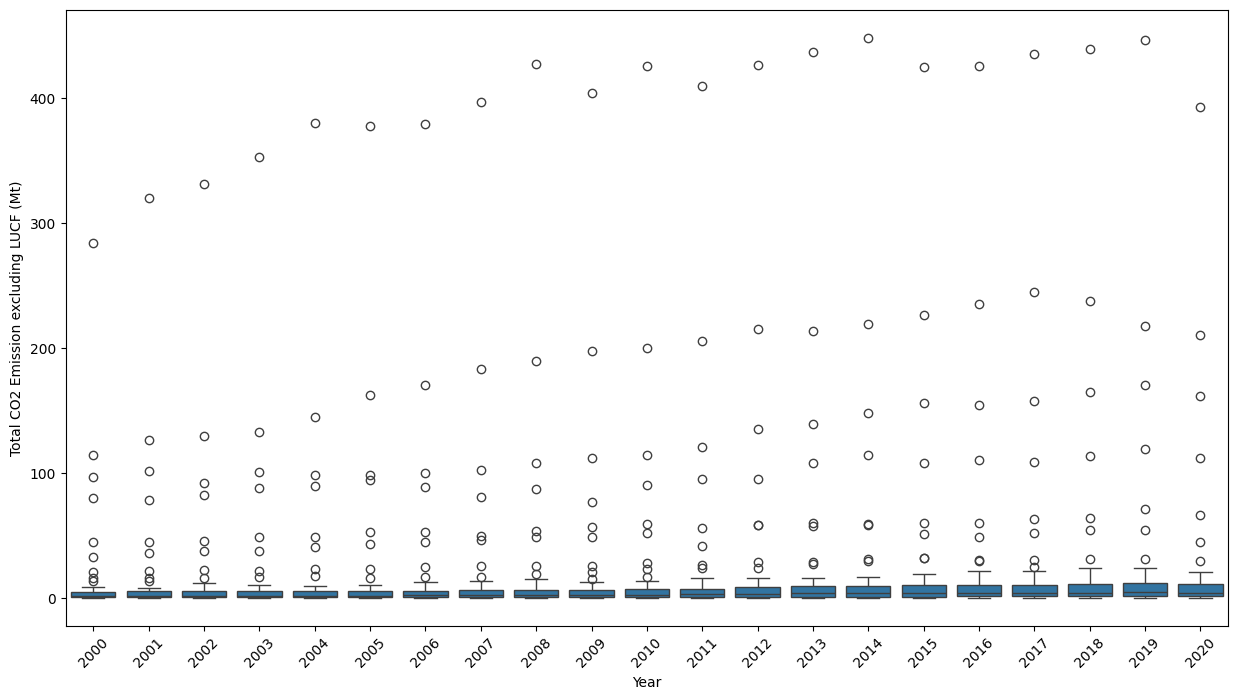

In [39]:
plt.figure(figsize=(15, 8))

# Create the boxplot
sns.boxplot(x='Year', y='Total CO2 Emission excluding LUCF (Mt)', data=df_final)

# Plot
plt.xticks(rotation=45)
plt.show()

In [40]:
total_co2_emissions = df_final['Total CO2 Emission excluding LUCF (Mt)'].sum()

print("Total CO2 Emissions: ", total_co2_emissions)

Total CO2 Emissions:  23608.71


In [41]:
df_final['Emission per Capita'] = df_final['Total CO2 Emission excluding LUCF (Mt)'] / df['Population']

C:\Users\shail\AppData\Local\Temp\ipykernel_14092\1845085375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Emission per Capita'] = df_final['Total CO2 Emission excluding LUCF (Mt)'] / df['Population']


# total Co2 vs year

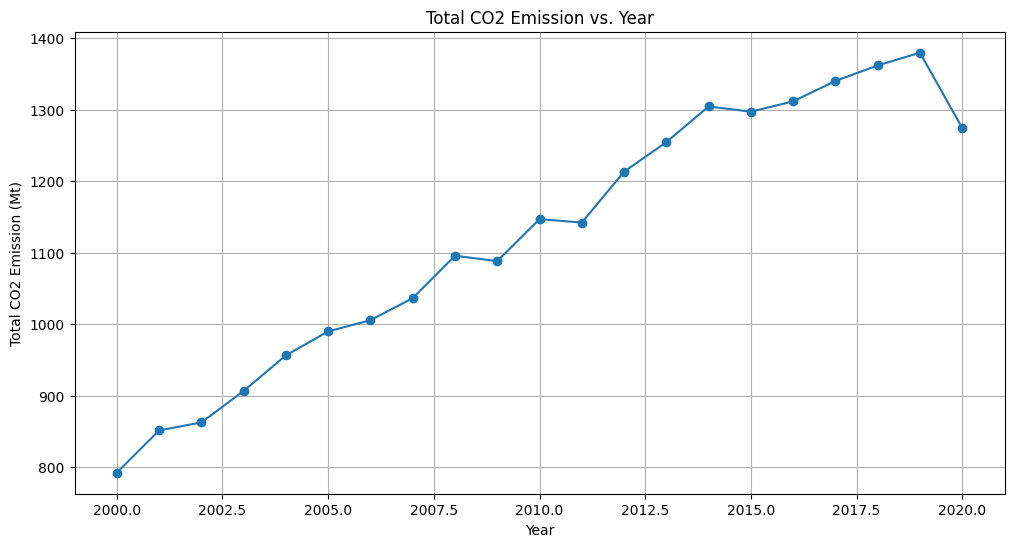

In [42]:
# Group by year and calculate the sum of CO2 emissions
total_co2_by_year = df_final.groupby('Year')['Total CO2 Emission excluding LUCF (Mt)'].sum().reset_index()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(total_co2_by_year['Year'], total_co2_by_year['Total CO2 Emission excluding LUCF (Mt)'], marker='o')
plt.title('Total CO2 Emission vs. Year')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.grid(True)
plt.show()

# # Total Co2 Emissions vs Population

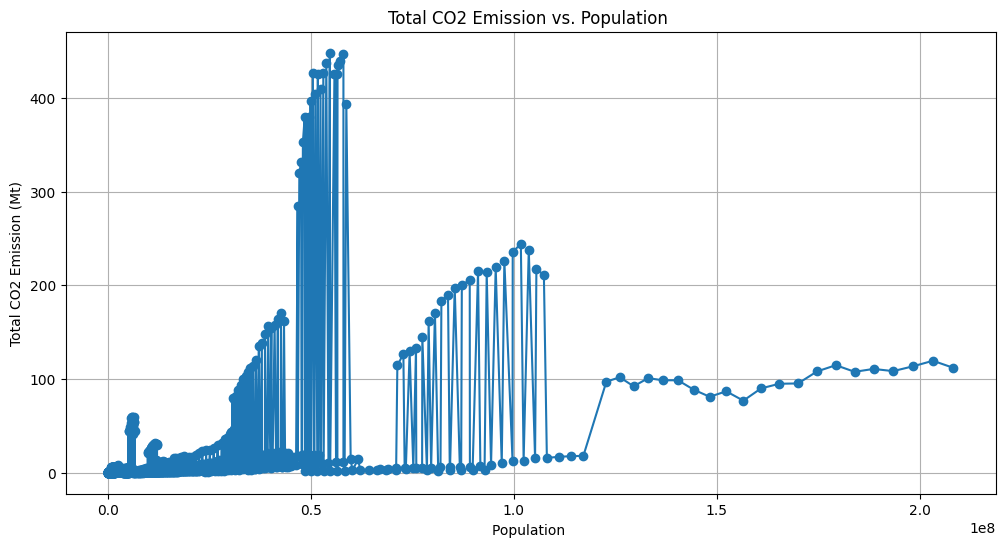

In [43]:
# Filter out columns
df = df[['Population', 'Total CO2 Emission excluding LUCF (Mt)'.strip()]]

# Group by year and calculate the sum of CO2 emissions
total_co2_by_year = df_final.groupby('Population')['Total CO2 Emission excluding LUCF (Mt)'.strip()].sum()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(total_co2_by_year.index, total_co2_by_year.values, marker='o')
plt.title('Total CO2 Emission vs. Population ')
plt.xlabel('Population ')
plt.ylabel('Total CO2 Emission (Mt)')
plt.grid(True)
plt.show() 

# # Energy vs Co2 countrywise

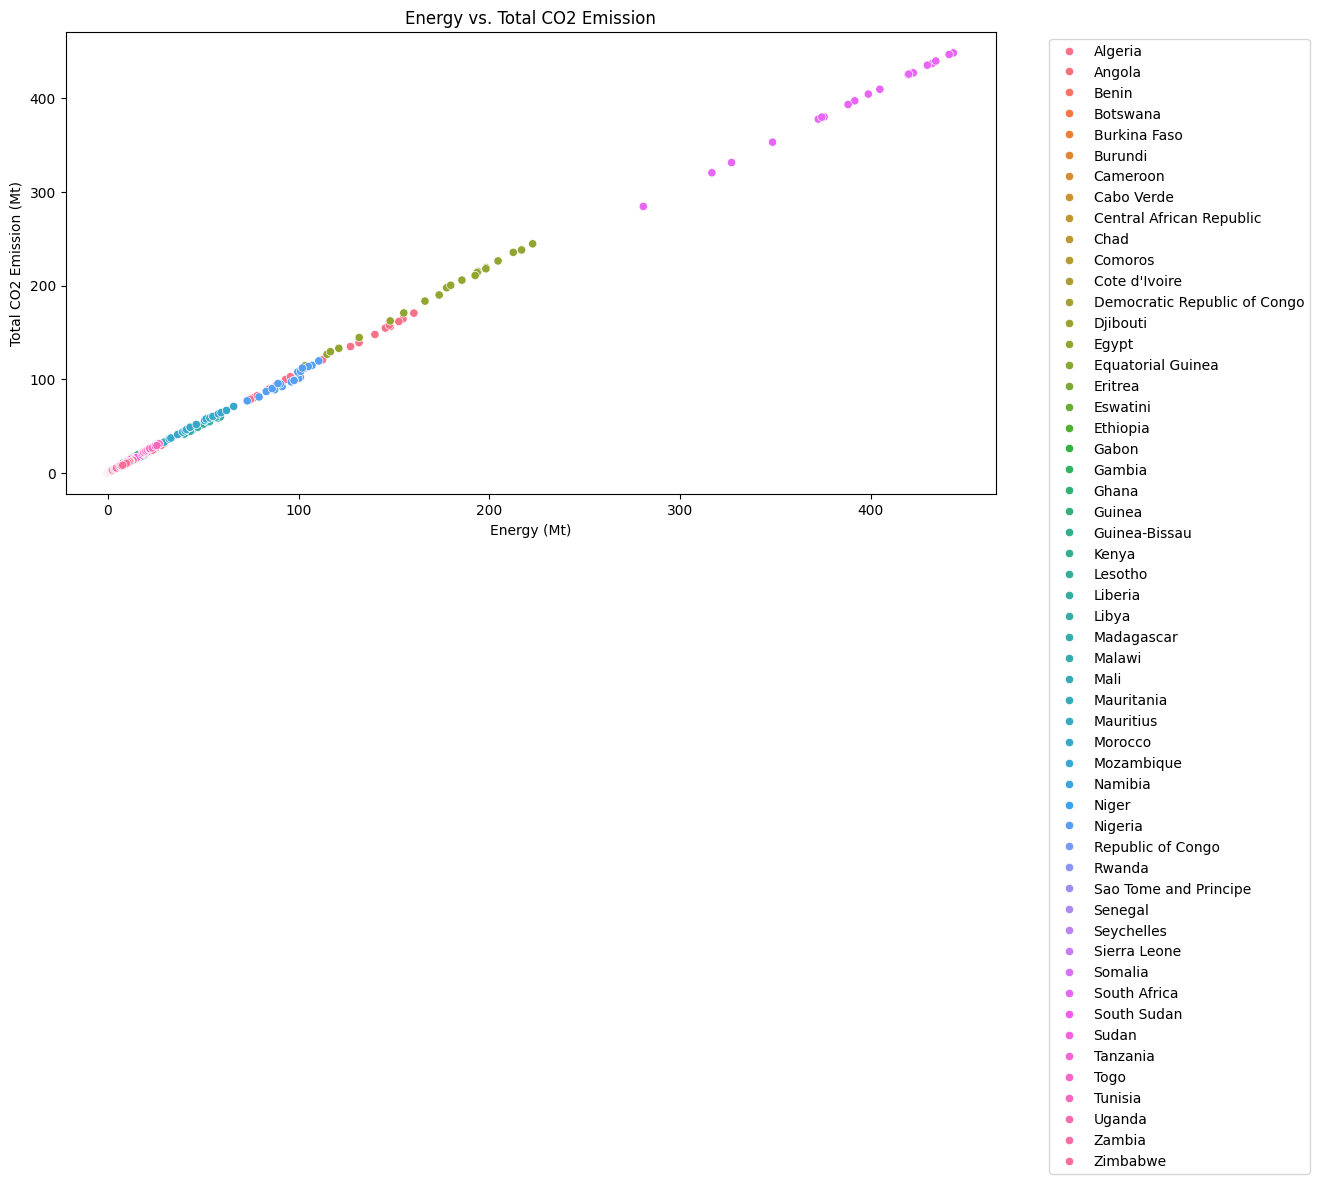

In [44]:
# Scatter plot for Energy vs. CO2 emissions with country colors
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Energy (Mt)', y='Total CO2 Emission excluding LUCF (Mt)', hue='Country', data=df_final)
plt.title('Energy vs. Total CO2 Emission')
plt.xlabel('Energy (Mt)')
plt.ylabel('Total CO2 Emission (Mt)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


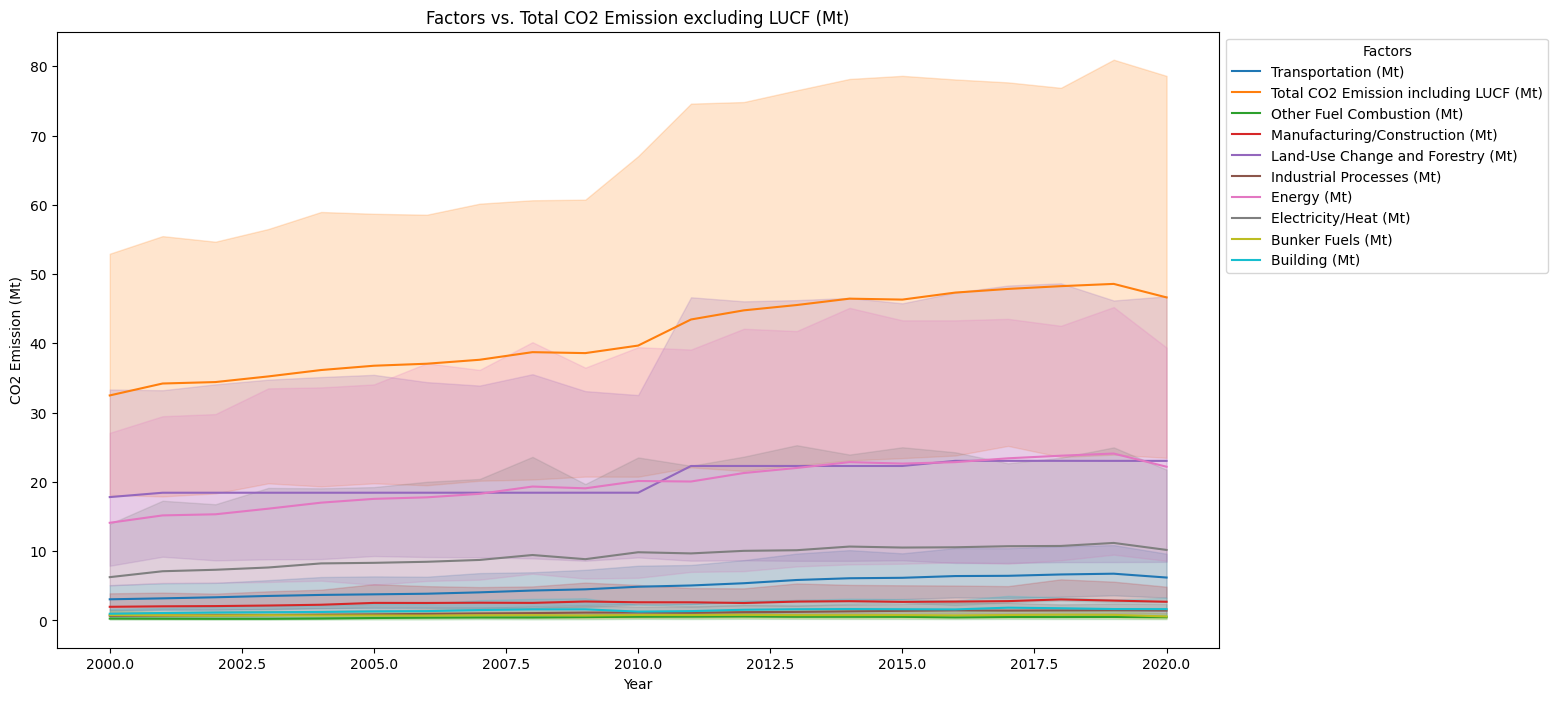

In [45]:
# Factors to consider
factors = ['Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)', 
           'Other Fuel Combustion (Mt)', 'Manufacturing/Construction (Mt)',
           'Land-Use Change and Forestry (Mt)', 'Industrial Processes (Mt)',
           'Energy (Mt)', 'Electricity/Heat (Mt)',
           'Bunker Fuels (Mt)', 'Building (Mt)']

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot lines for each factor
for factor in factors:
    sns.lineplot(x='Year', y=factor, data=df_final, label=factor)

plt.xlabel('Year')
plt.ylabel('CO2 Emission (Mt)')
plt.title('Factors vs. Total CO2 Emission excluding LUCF (Mt)')
plt.legend(title='Factors', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

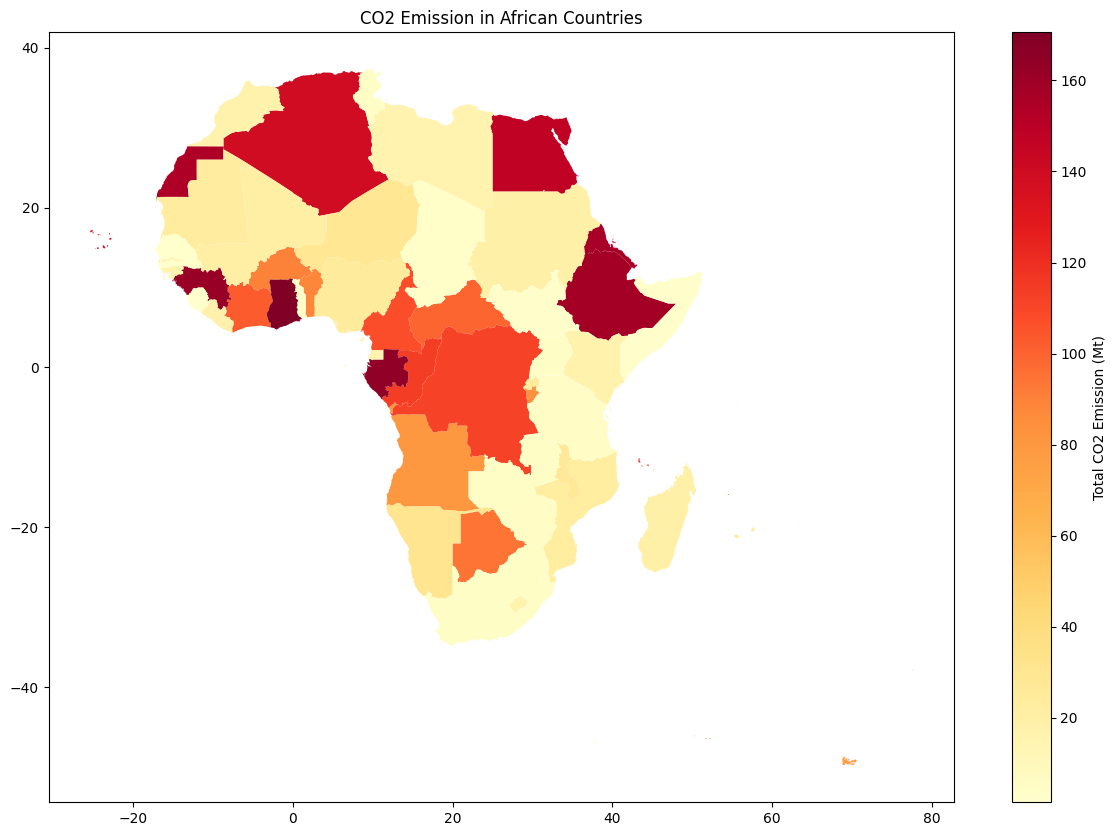

In [47]:
import geopandas as gpd

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile
world = gpd.read_file('E:/Clark/Python/Africa_Boundaries.shp')

world['Total CO2 Emission excluding LUCF (Mt)'] = df['Total CO2 Emission excluding LUCF (Mt)']

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_aspect('equal')

# Plot
cmap = 'YlOrRd'
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(world['Total CO2 Emission excluding LUCF (Mt)'])
world.plot(column='Total CO2 Emission excluding LUCF (Mt)', ax=ax, legend=True,
           legend_kwds={'label': "Total CO2 Emission (Mt)", 'orientation': "vertical"},
           cmap=cmap)

#Title
plt.title('CO2 Emission in African Countries')


#Plot
plt.show()